In [1]:
%pylab inline
import h5py 
import programas as pg
import pandas as pd
import grispy as gsp

Populating the interactive namespace from numpy and matplotlib


In [67]:
masa = '1e-03'
delta_gaus_sm = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_rhogal_'+masa+'_eul_bias_gaus_15-18-'+masa+'-0.9.npy')
delta_gaus_bg = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_rhogal_'+masa+'_eul_bias_gaus_25-40-'+masa+'-0.9.npy')
delta_gaus_mn = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_rhogal_'+masa+'_eul_bias_gaus_18-25-'+masa+'-0.9.npy')
delta_dm_sm = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_rhodm_eul_15-18-'+masa+'-0.9.npy')
delta_dm_bg = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_rhodm_eul_25-40-'+masa+'-0.9.npy')
delta_dm_mn = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_rhodm_eul_18-25-'+masa+'-0.9.npy')

In [68]:
delta_dm_sm = delta_dm_sm     #+ 0.001
delta_dm_bg = delta_dm_bg     #+ 0.001
delta_dm_mn = delta_dm_mn     #+ 0.001
delta_gaus_sm = delta_gaus_sm #+ 0.001
delta_gaus_bg = delta_gaus_bg #+ 0.001
delta_gaus_mn = delta_gaus_mn #+ 0.001

In [71]:
realizaciones = 20

mean_gaus_sm, error_gaus_sm = pg.perfil_jack(delta_gaus_sm,realizaciones)
mean_gaus_bg, error_gaus_bg = pg.perfil_jack(delta_gaus_bg,realizaciones)
mean_gaus_mn, error_gaus_mn = pg.perfil_jack(delta_gaus_mn,realizaciones)
mean_dm_sm, error_dm_sm = pg.perfil_jack(delta_dm_sm,realizaciones)
mean_dm_bg, error_dm_bg = pg.perfil_jack(delta_dm_bg,realizaciones)
mean_dm_mn, error_dm_mn = pg.perfil_jack(delta_dm_mn,realizaciones)

In [72]:
quo_sm = mean_gaus_sm/mean_dm_sm
quo_bg = mean_gaus_bg/mean_dm_bg
quo_mn = mean_gaus_mn/mean_dm_mn

quo_sm_e = np.sqrt( (error_gaus_sm/mean_dm_sm)**2 + ((mean_gaus_sm/(mean_dm_sm**2)) * error_dm_sm)**2)
quo_bg_e = np.sqrt( (error_gaus_bg/mean_dm_bg)**2 + ((mean_gaus_bg/(mean_dm_bg**2)) * error_dm_bg)**2)
quo_mn_e = np.sqrt( (error_gaus_mn/mean_dm_mn)**2 + ((mean_gaus_mn/(mean_dm_mn**2)) * error_dm_mn)**2)

In [73]:
dif_sm = mean_dm_sm-mean_gaus_sm
dif_sm_e = np.sqrt( (error_dm_sm)**2 + (error_gaus_sm)**2)
dif_bg = mean_dm_bg-mean_gaus_bg
dif_bg_e = np.sqrt( (error_dm_bg)**2 + (error_gaus_bg)**2)
dif_mn = mean_dm_mn-mean_gaus_mn
dif_mn_e = np.sqrt( (error_dm_mn)**2 + (error_gaus_mn)**2)

In [74]:
df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_'+masa+'_eul_bias_gaus-15-18-'+masa+'_-0.9.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

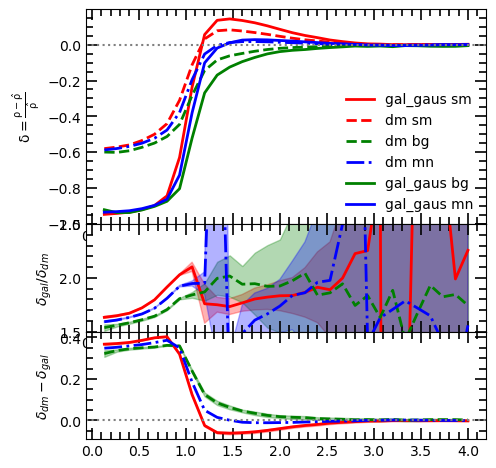

In [80]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(5,5),sharey='row'
                       ,gridspec_kw={'height_ratios': [2, 1, 1]})
fig.subplots_adjust(hspace=(0.00),wspace=(.28),bottom=0.12, top=0.98, left=0.17, right=0.97)


ax[0].plot(dist,mean_gaus_sm,color='red',lw=2,label='gal_gaus sm')
#ax[0].fill_between(dist,mean_gaus_sm-error_gaus_sm,mean_gaus_sm+error_gaus_sm,
#                   color='red',alpha=.3)
#ax[0].plot(dist_exp,delta_exp,color='blue',lw=3,label='rhogal_expansion')
ax[0].plot(dist,mean_dm_sm,color='red',lw=2,ls='--',label='dm sm')
ax[0].plot(dist,mean_dm_bg,color='green',lw=2,ls='--',label='dm bg')
ax[0].plot(dist,mean_dm_mn,color='blue',lw=2,ls='-.',label='dm mn')
#ax[0].plot(dist_exp,delta_exp,color='blue',lw=3,label='rhogal_expansion')
ax[0].plot(dist,mean_gaus_bg,color='green',lw=2,label='gal_gaus bg')
ax[0].plot(dist,mean_gaus_mn,color='blue',lw=2,label='gal_gaus mn')
#ax[0].plot(dist_dm,delta_mio_sm,color='yellow',lw=2,ls='dotted',label='mio bg')

#ax[0].plot(dist_mio,delta_mio,color='cyan',lw=3,label='simulation smooth',ls='dotted')

#mean_galaxies = pg.mean_profile(perfiles)
#ax[0].plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')

ax[0].set_xlabel('$ \\rm d/r_{void} $', size=10)
ax[0].set_ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=10)

ax[0].axhline(y=0,color='grey',ls='dotted')

ax[0].legend(frameon=False,fontsize=10,loc='lower right')
ax[0].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[0].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[0].tick_params(labelsize=10)
ax[0].minorticks_on()

ax[1].plot(dist,quo_sm,color='red',lw=2,label='rhogal_gaus sm')
ax[1].fill_between(dist,quo_sm-quo_sm_e,quo_sm+quo_sm_e,color='red',alpha=.3)
ax[1].plot(dist,quo_bg,color='green',lw=2,ls='--',label='rhogal_gaus sm')
ax[1].fill_between(dist,quo_bg-quo_bg_e,quo_bg+quo_bg_e,color='green',alpha=.3)
ax[1].plot(dist,quo_mn,color='blue',lw=2,ls='-.',label='rhogal_gaus mn')
ax[1].fill_between(dist,quo_mn-quo_mn_e,quo_mn+quo_mn_e,color='blue',alpha=.3)

#ax[1].plot(dist_exp,delta_exp/delta_dm,color='blue',lw=3,label='rhogal_expansion')
#ax[1].plot(dist_mio,delta_mio/delta_dm,color='cyan',lw=3,label='simulation smooth',ls='dotted')
#ax[1].plot(bineado[1:],mean_galaxies/delta_dm, color='orange',lw=5, ls='--', label='simulation')

ax[1].set_ylim(1.5,2.5)
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[1].tick_params(labelsize=10)
ax[1].minorticks_on()
ax[1].set_ylabel('$ \\delta_{gal}/\\delta_{dm} $',size=10)


ax[2].plot(dist,dif_sm,color='red',lw=2,label='rhogal_gaus sm')
ax[2].fill_between(dist,dif_sm-dif_sm_e,dif_sm+dif_sm_e,color='red',alpha=.3)
#ax[2].fill_between(dist,quo_sm-quo_sm_e,quo_sm+quo_sm_e,color='red',alpha=.3)
ax[2].plot(dist,mean_dm_bg-mean_gaus_bg,color='green',lw=2,ls='--',label='rhogal_gaus sm')
ax[2].fill_between(dist,dif_bg-dif_bg_e,dif_bg+dif_bg_e,color='green',alpha=.3)
ax[2].plot(dist,mean_dm_mn-mean_gaus_mn,color='blue',lw=2,ls='-.',label='rhogal_gaus mn')
#ax[2].fill_between(dist,quo_bg-quo_bg_e,quo_bg+quo_bg_e,color='green',alpha=.3)
ax[2].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[2].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[2].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[2].tick_params(labelsize=10)
ax[2].minorticks_on()
ax[2].set_ylabel('$\\delta_{dm}- \\delta_{gal}$',size=10)
ax[2].axhline(y=0,color='grey',ls='dotted')


ax[1].yaxis.set_tick_params(labelsize=10)
##ax[1].hlines(y=1,xmin=0,xmax=1.18,color='grey')
##ax10].set_ylim(0.95,1.05)
ax[1].yaxis.set_tick_params(labelsize=10)
ax[1].xaxis.set_tick_params(labelsize=10)
#ax[0].text(2,-0.4,'$\\rm v_{peak}=5e-4$',size=12)

(-10.0, 30.0)

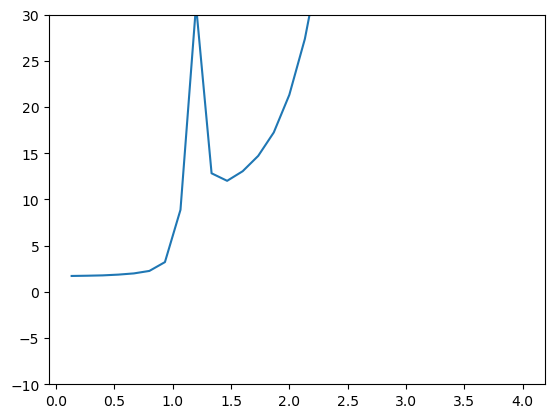

In [90]:
plt.plot(dist,abs(1/mean_dm_sm) )
plt.ylim(-10,30)

Text(2, -0.4, '$\\rm v_{peak}=2e-3$')

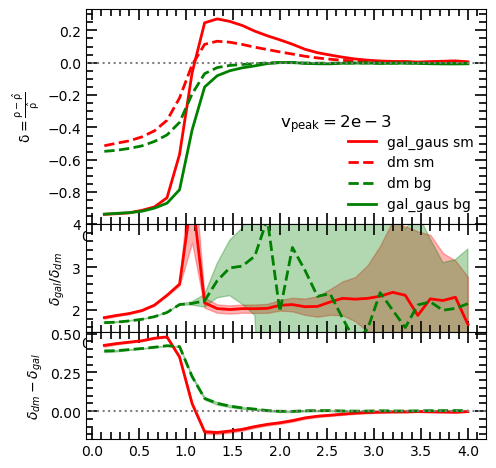

In [31]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(5,5),sharey='row'
                       ,gridspec_kw={'height_ratios': [2, 1, 1]})
fig.subplots_adjust(hspace=(0.00),wspace=(.28),bottom=0.12, top=0.98, left=0.17, right=0.97)


ax[0].plot(dist,mean_gaus_sm,color='red',lw=2,label='gal_gaus sm')
#ax[0].fill_between(dist,mean_gaus_sm-error_gaus_sm,mean_gaus_sm+error_gaus_sm,
#                   color='red',alpha=.3)
#ax[0].plot(dist_exp,delta_exp,color='blue',lw=3,label='rhogal_expansion')
ax[0].plot(dist,mean_dm_sm,color='red',lw=2,ls='--',label='dm sm')
ax[0].plot(dist,mean_dm_bg,color='green',lw=2,ls='--',label='dm bg')
#ax[0].plot(dist_exp,delta_exp,color='blue',lw=3,label='rhogal_expansion')
ax[0].plot(dist,mean_gaus_bg,color='green',lw=2,label='gal_gaus bg')
#ax[0].plot(dist_dm,delta_mio_sm,color='yellow',lw=2,ls='dotted',label='mio bg')

#ax[0].plot(dist_mio,delta_mio,color='cyan',lw=3,label='simulation smooth',ls='dotted')

#mean_galaxies = pg.mean_profile(perfiles)
#ax[0].plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')

ax[0].set_xlabel('$ \\rm d/r_{void} $', size=10)
ax[0].set_ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=10)

ax[0].axhline(y=0,color='grey',ls='dotted')

ax[0].legend(frameon=False,fontsize=10,loc='lower right')
ax[0].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[0].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[0].tick_params(labelsize=10)
ax[0].minorticks_on()

ax[1].plot(dist,quo_sm,color='red',lw=2,label='rhogal_gaus sm')
ax[1].fill_between(dist,quo_sm-quo_sm_e,quo_sm+quo_sm_e,color='red',alpha=.3)
ax[1].plot(dist,quo_bg,color='green',lw=2,ls='--',label='rhogal_gaus sm')
ax[1].fill_between(dist,quo_bg-quo_bg_e,quo_bg+quo_bg_e,color='green',alpha=.3)
#ax[1].plot(dist_exp,delta_exp/delta_dm,color='blue',lw=3,label='rhogal_expansion')
#ax[1].plot(dist_mio,delta_mio/delta_dm,color='cyan',lw=3,label='simulation smooth',ls='dotted')
#ax[1].plot(bineado[1:],mean_galaxies/delta_dm, color='orange',lw=5, ls='--', label='simulation')

ax[1].set_ylim(1.5,4)
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[1].tick_params(labelsize=10)
ax[1].minorticks_on()
ax[1].set_ylabel('$ \\delta_{gal}/\\delta_{dm} $',size=10)


ax[2].plot(dist,dif_sm,color='red',lw=2,label='rhogal_gaus sm')
ax[2].fill_between(dist,dif_sm-dif_sm_e,dif_sm+dif_sm_e,color='red',alpha=.3)
#ax[2].fill_between(dist,quo_sm-quo_sm_e,quo_sm+quo_sm_e,color='red',alpha=.3)
ax[2].plot(dist,mean_dm_bg-mean_gaus_bg,color='green',lw=2,ls='--',label='rhogal_gaus sm')
ax[2].fill_between(dist,dif_bg-dif_bg_e,dif_bg+dif_bg_e,color='green',alpha=.3)
#ax[2].fill_between(dist,quo_bg-quo_bg_e,quo_bg+quo_bg_e,color='green',alpha=.3)
ax[2].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[2].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[2].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[2].tick_params(labelsize=10)
ax[2].minorticks_on()
ax[2].set_ylabel('$\\delta_{dm}- \\delta_{gal}$',size=10)
ax[2].axhline(y=0,color='grey',ls='dotted')


ax[1].yaxis.set_tick_params(labelsize=10)
##ax[1].hlines(y=1,xmin=0,xmax=1.18,color='grey')
##ax10].set_ylim(0.95,1.05)
ax[1].yaxis.set_tick_params(labelsize=10)
ax[1].xaxis.set_tick_params(labelsize=10)
ax[0].text(2,-0.4,'$\\rm v_{peak}=2e-3$',size=12)

In [32]:
mean_dm_bg

array([-5.47842503e-01, -5.41121339e-01, -5.29602619e-01, -5.13951703e-01,
       -4.86538567e-01, -4.46223362e-01, -3.68722778e-01, -1.92976543e-01,
       -6.75387235e-02, -2.99578787e-02, -1.66261381e-02, -1.03614476e-02,
       -5.94766529e-03, -1.29808056e-03,  7.07581082e-04,  4.61316017e-04,
       -1.39648944e-03, -2.72257959e-03, -2.85375265e-03, -1.63865748e-03,
       -1.45009798e-03, -1.24200184e-03, -1.79089572e-03, -1.59122030e-03,
       -1.52452789e-03, -1.91453932e-03, -2.81649231e-03, -3.57895168e-03,
       -3.63098769e-03, -2.99060718e-03])

In [33]:
error_dm_bg

array([0.00486855, 0.00288036, 0.00184749, 0.00119048, 0.00128073,
       0.00109327, 0.0014097 , 0.00249394, 0.00320458, 0.00337562,
       0.00289128, 0.00246077, 0.00207437, 0.00196489, 0.00187367,
       0.00179793, 0.00172262, 0.0017071 , 0.00157913, 0.00171123,
       0.00174266, 0.00147994, 0.00137552, 0.00122588, 0.00122475,
       0.00131424, 0.00131683, 0.0013406 , 0.00135693, 0.00119412])

In [ ]:
stop

In [ ]:
df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_1e-03_eul_bias_gaus-25-40-1e-03_-0.9.csv')
dist_gaus = df['distance']
mean_gaus = df['media']

delta_gaus_bg = mean_gaus 

#df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_5e-04_eul_bias_expansion_-0.9.csv')
#dist_exp = df['distance']
#mean_exp = df['media']

delta_exp = mean_exp 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhodm_eul-25-40-1e-03_-0.9.csv')
dist_dm = df['distance']
mean_dm = df['media']

delta_dm_bg = mean_dm 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_smoothed_field_1e-03-25-40-1e-03_-0.9.csv')
dist_mio = df['distance']
mean_mio = df['media']

delta_mio_bg = mean_mio

# . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . .
# . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . .
# . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . .

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_1e-03_eul_bias_gaus-15-18-1e-03_-0.9.csv')
dist_gaus = df['distance']
mean_gaus = df['media']

delta_gaus_sm = mean_gaus 

#df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_5e-04_eul_bias_expansion_-0.9.csv')
#dist_exp = df['distance']
#mean_exp = df['media']

delta_exp = mean_exp 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhodm_eul-15-18-1e-03_-0.9.csv')
dist_dm = df['distance']
mean_dm = df['media']

delta_dm_sm = mean_dm

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_smoothed_field_1e-03-15-18-1e-03_-0.9.csv')
dist_mio = df['distance']
mean_mio = df['media']

delta_mio_sm = mean_mio

(0.0, 3.0)

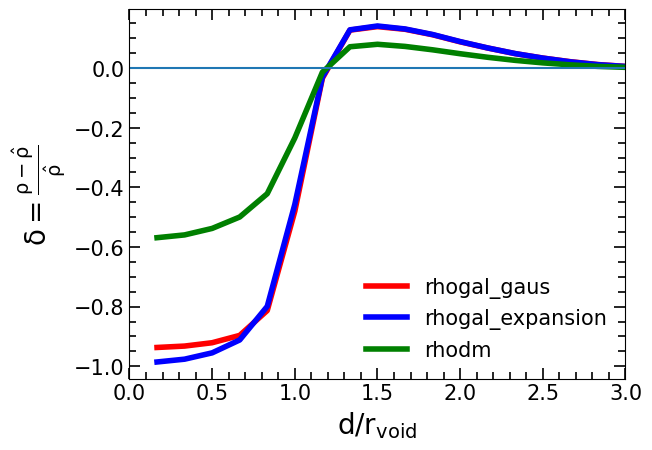

In [2]:
df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_1e-03_eul_bias_gaus_-0.9.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']


delta = mean 


plt.plot(dist,delta,color='red',lw=4,label='rhogal_gaus')
#plt.fill_between(dist,delta_q25,delta_q75,color='red',alpha=.3)

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_1e-03_eul_bias_expansion_-0.9.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']


delta = mean 

plt.plot(dist,delta,color='blue',lw=4,label='rhogal_expansion')
#plt.fill_between(dist,delta_q25,delta_q75,color='blue',alpha=.3)

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhodm_eul1e-03_-0.9.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']


delta = mean 
plt.plot(dist,delta,color='green',lw=4,label='rhodm')


#df = pd.read_csv('../perfiles_smoothed_field_mio_pruebas.csv')
#dist = df['distance']
#mediana = df['mediana']
#q25 = df['q25']
#q75 = df['q75']
#mean = df['media']
#
#field = np.load('../density_field_mio.npy')
#rhomean = np.mean(field)
#delta = (mean - rhomean)/rhomean
#delta_q25 = (q25 - rhomean)/rhomean
#delta_q75 = (q75 - rhomean)/rhomean
#
#plt.plot(dist,delta,color='cyan',lw=4,label='simulation smooth',ls='dotted')
#
#mean_galaxies = pg.mean_profile(perfiles)
#plt.plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')
#plt.fill_between(bineado[1:],q1,q2,color='orange',alpha=.3)

plt.legend(frameon=False,fontsize=15,loc='lower right')
plt.tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
plt.tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
plt.tick_params(labelsize=15)
plt.minorticks_on()

plt.xlabel('$ \\rm d/r_{void} $', size=20)
plt.ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=20)

plt.axhline(y = 0)

plt.xlim(0,3)

In [3]:
df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_1e-03_eul_bias_gaus_-0.9.csv')
dist_gaus = df['distance']
mean_gaus = df['media']

delta_gaus = mean_gaus 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_1e-03_eul_bias_expansion_-0.9.csv')
dist_exp = df['distance']
mean_exp = df['media']

delta_exp = mean_exp 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhodm_eul1e-03_-0.9.csv')
dist_dm = df['distance']
mean_dm = df['media']

delta_dm = mean_dm 

#df = pd.read_csv('../perfiles_smoothed_field_mio_pruebas.csv')
#dist_mio = df['distance']
#mean_mio = df['media']
#
#field = np.load('../density_field_mio.npy')
#rhomean = np.mean(field)
#delta_mio = (mean_mio - rhomean)/rhomean

Text(3, -0.4, '$ v_{peak}=1e-3$')

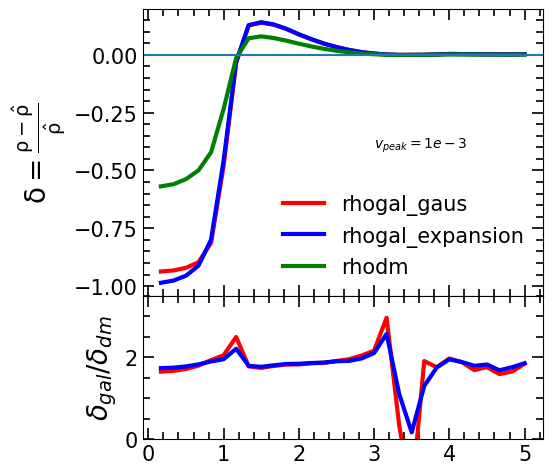

In [4]:
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(5,5),sharey='row'
                       ,gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=(0.00),wspace=(.28),bottom=0.12, top=0.98, left=0.17, right=0.97)


ax[0].plot(dist_gaus,delta_gaus,color='red',lw=3,label='rhogal_gaus')
ax[0].plot(dist_exp,delta_exp,color='blue',lw=3,label='rhogal_expansion')
ax[0].plot(dist_dm,delta_dm,color='green',lw=3,label='rhodm')
#ax[0].plot(dist_mio,delta_mio,color='cyan',lw=3,label='simulation smooth',ls='dotted')

#mean_galaxies = pg.mean_profile(perfiles)
#ax[0].plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')

ax[0].set_xlabel('$ \\rm d/r_{void} $', size=20)
ax[0].set_ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=20)

ax[0].axhline(y = 0)

ax[0].legend(frameon=False,fontsize=15,loc='lower right')
ax[0].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[0].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[0].tick_params(labelsize=15)
ax[0].minorticks_on()

ax[1].plot(dist_gaus,delta_gaus/delta_dm,color='red',lw=3,label='rhogal_gaus')
ax[1].plot(dist_exp,delta_exp/delta_dm,color='blue',lw=3,label='rhogal_expansion')
#ax[1].plot(dist_mio,delta_mio/delta_dm,color='cyan',lw=3,label='simulation smooth',ls='dotted')
#ax[1].plot(bineado[1:],mean_galaxies/delta_dm, color='orange',lw=5, ls='--', label='simulation')

ax[1].set_ylim(0,3.5)
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[1].tick_params(labelsize=15)
ax[1].minorticks_on()
ax[1].set_ylabel('$ \\delta_{gal}/\\delta_{dm} $',size=20)


ax[1].yaxis.set_tick_params(labelsize=15)
##ax[1].hlines(y=1,xmin=0,xmax=1.18,color='grey')
##ax10].set_ylim(0.95,1.05)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[1].xaxis.set_tick_params(labelsize=15)
ax[0].text(3,-0.4,'$ v_{peak}=1e-3$',size=10)
#plt.savefig(fname='/u/arodriguez/lacegal/TNG300/figuras/met-sfr0.pdf',format='pdf')

In [41]:
df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_2e-03_eul_bias_gaus_-0.9.csv')
dist_gaus = df['distance']
mean_gaus = df['media']

delta_gaus = mean_gaus 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_2e-03_eul_bias_expansion_-0.9.csv')
dist_exp = df['distance']
mean_exp = df['media']

delta_exp = mean_exp 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhodm_eul2e-03_-0.9.csv')
dist_dm = df['distance']
mean_dm = df['media']

delta_dm = mean_dm 

#df = pd.read_csv('../perfiles_smoothed_field_mio_pruebas.csv')
#dist_mio = df['distance']
#mean_mio = df['media']
#
#field = np.load('../density_field_mio.npy')
#rhomean = np.mean(field)
#delta_mio = (mean_mio - rhomean)/rhomean

Text(3, -0.4, '$ v_{peak}=2e-3$')

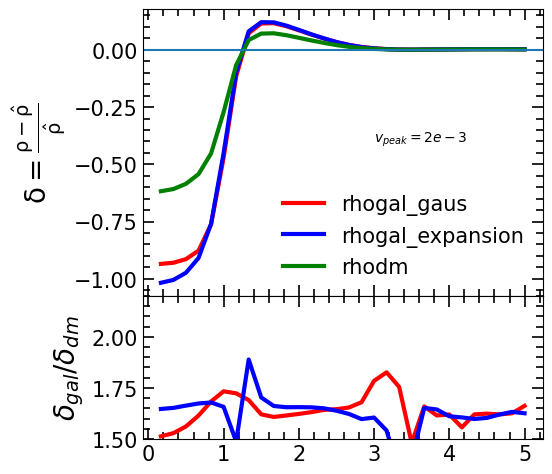

In [42]:
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(5,5),sharey='row'
                       ,gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=(0.00),wspace=(.28),bottom=0.12, top=0.98, left=0.17, right=0.97)


ax[0].plot(dist_gaus,delta_gaus,color='red',lw=3,label='rhogal_gaus')
ax[0].plot(dist_exp,delta_exp,color='blue',lw=3,label='rhogal_expansion')
ax[0].plot(dist_dm,delta_dm,color='green',lw=3,label='rhodm')
#ax[0].plot(dist_mio,delta_mio,color='cyan',lw=3,label='simulation smooth',ls='dotted')

#mean_galaxies = pg.mean_profile(perfiles)
#ax[0].plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')

ax[0].set_xlabel('$ \\rm d/r_{void} $', size=20)
ax[0].set_ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=20)

ax[0].axhline(y = 0)

ax[0].legend(frameon=False,fontsize=15,loc='lower right')
ax[0].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[0].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[0].tick_params(labelsize=15)
ax[0].minorticks_on()

ax[1].plot(dist_gaus,delta_gaus/delta_dm,color='red',lw=3,label='rhogal_gaus')
ax[1].plot(dist_exp,delta_exp/delta_dm,color='blue',lw=3,label='rhogal_expansion')
#ax[1].plot(dist_mio,delta_mio/delta_dm,color='cyan',lw=3,label='simulation smooth',ls='dotted')
#ax[1].plot(bineado[1:],mean_galaxies/delta_dm, color='orange',lw=5, ls='--', label='simulation')

ax[1].set_ylim(1.5,2.2)
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[1].tick_params(labelsize=15)
ax[1].minorticks_on()
ax[1].set_ylabel('$ \\delta_{gal}/\\delta_{dm} $',size=20)



ax[1].yaxis.set_tick_params(labelsize=15)
##ax[1].hlines(y=1,xmin=0,xmax=1.18,color='grey')
##ax10].set_ylim(0.95,1.05)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[1].xaxis.set_tick_params(labelsize=15)
ax[0].text(3,-0.4,'$ v_{peak}=2e-3$',size=10)

In [7]:
df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_2e-04_eul_bias_gaus_-0.9.csv')
dist_gaus = df['distance']
mean_gaus = df['media']

delta_gaus = mean_gaus 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_2e-04_eul_bias_expansion_-0.9.csv')
dist_exp = df['distance']
mean_exp = df['media']

delta_exp = mean_exp 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhodm_eul2e-04_-0.9.csv')
dist_dm = df['distance']
mean_dm = df['media']

delta_dm = mean_dm 

#df = pd.read_csv('../perfiles_smoothed_field_mio_pruebas.csv')
#dist_mio = df['distance']
#mean_mio = df['media']
#
#field = np.load('../density_field_mio.npy')
#rhomean = np.mean(field)
#delta_mio = (mean_mio - rhomean)/rhomean

Text(3, -0.4, '$ v_{peak}=2e-4$')

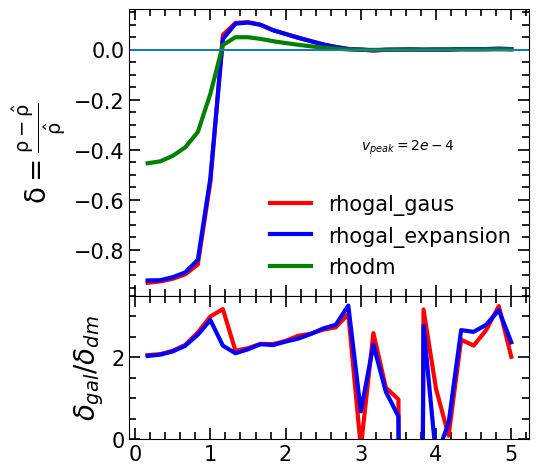

In [8]:
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(5,5),sharey='row'
                       ,gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=(0.00),wspace=(.28),bottom=0.12, top=0.98, left=0.17, right=0.97)


ax[0].plot(dist_gaus,delta_gaus,color='red',lw=3,label='rhogal_gaus')
ax[0].plot(dist_exp,delta_exp,color='blue',lw=3,label='rhogal_expansion')
ax[0].plot(dist_dm,delta_dm,color='green',lw=3,label='rhodm')
#ax[0].plot(dist_mio,delta_mio,color='cyan',lw=3,label='simulation smooth',ls='dotted')

#mean_galaxies = pg.mean_profile(perfiles)
#ax[0].plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')

ax[0].set_xlabel('$ \\rm d/r_{void} $', size=20)
ax[0].set_ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=20)

ax[0].axhline(y = 0)

ax[0].legend(frameon=False,fontsize=15,loc='lower right')
ax[0].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[0].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[0].tick_params(labelsize=15)
ax[0].minorticks_on()

ax[1].plot(dist_gaus,delta_gaus/delta_dm,color='red',lw=3,label='rhogal_gaus')
ax[1].plot(dist_exp,delta_exp/delta_dm,color='blue',lw=3,label='rhogal_expansion')
#ax[1].plot(dist_mio,delta_mio/delta_dm,color='cyan',lw=3,label='simulation smooth',ls='dotted')
#ax[1].plot(bineado[1:],mean_galaxies/delta_dm, color='orange',lw=5, ls='--', label='simulation')

ax[1].set_ylim(0,3.5)
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[1].tick_params(labelsize=15)
ax[1].minorticks_on()
ax[1].set_ylabel('$ \\delta_{gal}/\\delta_{dm} $',size=20)



ax[1].yaxis.set_tick_params(labelsize=15)
##ax[1].hlines(y=1,xmin=0,xmax=1.18,color='grey')
##ax10].set_ylim(0.95,1.05)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[1].xaxis.set_tick_params(labelsize=15)
ax[0].text(3,-0.4,'$ v_{peak}=2e-4$',size=10)

In [38]:
df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_5e-04_eul_bias_gaus_-0.9.csv')
dist_gaus = df['distance']
mean_gaus = df['media']

delta_gaus = mean_gaus 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_5e-04_eul_bias_expansion_-0.9.csv')
dist_exp = df['distance']
mean_exp = df['media']

delta_exp = mean_exp 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhodm_eul5e-04_-0.9.csv')
dist_dm = df['distance']
mean_dm = df['media']

delta_dm = mean_dm 

#df = pd.read_csv('../perfiles_smoothed_field_mio_pruebas.csv')
#dist_mio = df['distance']
#mean_mio = df['media']
#
#field = np.load('../density_field_mio.npy')
#rhomean = np.mean(field)
#delta_mio = (mean_mio - rhomean)/rhomean

Text(3, -0.4, '$ v_{peak}=5e-4$')

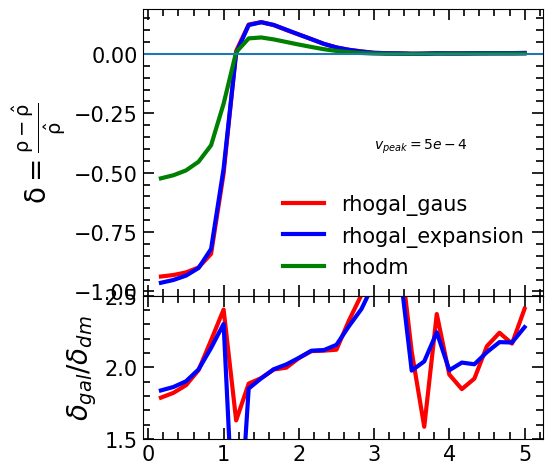

In [40]:
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(5,5),sharey='row'
                       ,gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=(0.00),wspace=(.28),bottom=0.12, top=0.98, left=0.17, right=0.97)


ax[0].plot(dist_gaus,delta_gaus,color='red',lw=3,label='rhogal_gaus')
ax[0].plot(dist_exp,delta_exp,color='blue',lw=3,label='rhogal_expansion')
ax[0].plot(dist_dm,delta_dm,color='green',lw=3,label='rhodm')
#ax[0].plot(dist_mio,delta_mio,color='cyan',lw=3,label='simulation smooth',ls='dotted')

#mean_galaxies = pg.mean_profile(perfiles)
#ax[0].plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')

ax[0].set_xlabel('$ \\rm d/r_{void} $', size=20)
ax[0].set_ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=20)

ax[0].axhline(y = 0)

ax[0].legend(frameon=False,fontsize=15,loc='lower right')
ax[0].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[0].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[0].tick_params(labelsize=15)
ax[0].minorticks_on()

ax[1].plot(dist_gaus,delta_gaus/delta_dm,color='red',lw=3,label='rhogal_gaus')
ax[1].plot(dist_exp,delta_exp/delta_dm,color='blue',lw=3,label='rhogal_expansion')
#ax[1].plot(dist_mio,delta_mio/delta_dm,color='cyan',lw=3,label='simulation smooth',ls='dotted')
#ax[1].plot(bineado[1:],mean_galaxies/delta_dm, color='orange',lw=5, ls='--', label='simulation')

ax[1].set_ylim(1.5,2.5)
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[1].tick_params(labelsize=15)
ax[1].minorticks_on()
ax[1].set_ylabel('$ \\delta_{gal}/\\delta_{dm} $',size=20)



ax[1].yaxis.set_tick_params(labelsize=15)
##ax[1].hlines(y=1,xmin=0,xmax=1.18,color='grey')
##ax10].set_ylim(0.95,1.05)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[1].xaxis.set_tick_params(labelsize=15)
ax[0].text(3,-0.4,'$ v_{peak}=5e-4$',size=10)

In [11]:
stop

NameError: name 'stop' is not defined

In [28]:
df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_1e-03_eul_bias_gaus-25-40-1e-03_-0.9.csv')
dist_gaus = df['distance']
mean_gaus = df['media']

delta_gaus_bg = mean_gaus 

#df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_5e-04_eul_bias_expansion_-0.9.csv')
#dist_exp = df['distance']
#mean_exp = df['media']

delta_exp = mean_exp 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhodm_eul-25-40-1e-03_-0.9.csv')
dist_dm = df['distance']
mean_dm = df['media']

delta_dm_bg = mean_dm 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_smoothed_field_1e-03-25-40-1e-03_-0.9.csv')
dist_mio = df['distance']
mean_mio = df['media']

delta_mio_bg = mean_mio

# . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . .
# . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . .
# . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . .

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_1e-03_eul_bias_gaus-15-18-1e-03_-0.9.csv')
dist_gaus = df['distance']
mean_gaus = df['media']

delta_gaus_sm = mean_gaus 

#df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhogal_5e-04_eul_bias_expansion_-0.9.csv')
#dist_exp = df['distance']
#mean_exp = df['media']

delta_exp = mean_exp 

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_rhodm_eul-15-18-1e-03_-0.9.csv')
dist_dm = df['distance']
mean_dm = df['media']

delta_dm_sm = mean_dm

df = pd.read_csv('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_prop_smoothed_field_1e-03-15-18-1e-03_-0.9.csv')
dist_mio = df['distance']
mean_mio = df['media']

delta_mio_sm = mean_mio

In [31]:
delta_gaus_sm = delta_gaus_sm + 0.001
delta_dm_sm = delta_dm_sm + 0.001
delta_gaus_bg = delta_gaus_bg + 0.001
delta_dm_bg = delta_dm_bg + 0.001

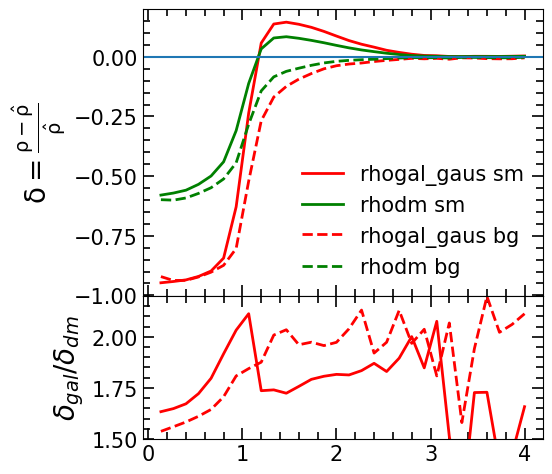

In [37]:
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(5,5),sharey='row'
                       ,gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=(0.00),wspace=(.28),bottom=0.12, top=0.98, left=0.17, right=0.97)


ax[0].plot(dist_gaus,delta_gaus_sm,color='red',lw=2,label='rhogal_gaus sm')
#ax[0].plot(dist_exp,delta_exp,color='blue',lw=3,label='rhogal_expansion')
ax[0].plot(dist_dm,delta_dm_sm,color='green',lw=2,label='rhodm sm')
ax[0].plot(dist_gaus,delta_gaus_bg,color='red',lw=2,ls='--',label='rhogal_gaus bg')
#ax[0].plot(dist_exp,delta_exp,color='blue',lw=3,label='rhogal_expansion')
ax[0].plot(dist_dm,delta_dm_bg,color='green',lw=2,ls='--',label='rhodm bg')
#ax[0].plot(dist_dm,delta_mio_sm,color='yellow',lw=2,ls='dotted',label='mio bg')

#ax[0].plot(dist_mio,delta_mio,color='cyan',lw=3,label='simulation smooth',ls='dotted')

#mean_galaxies = pg.mean_profile(perfiles)
#ax[0].plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')

ax[0].set_xlabel('$ \\rm d/r_{void} $', size=20)
ax[0].set_ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=20)

ax[0].axhline(y = 0)

ax[0].legend(frameon=False,fontsize=15,loc='lower right')
ax[0].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[0].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[0].tick_params(labelsize=15)
ax[0].minorticks_on()

ax[1].plot(dist_gaus,delta_gaus_sm/delta_dm_sm,color='red',lw=2,label='rhogal_gaus sm')
ax[1].plot(dist_gaus,delta_gaus_bg/delta_dm_bg,color='red',lw=2,ls='--',label='rhogal_gaus sm')
#ax[1].plot(dist_exp,delta_exp/delta_dm,color='blue',lw=3,label='rhogal_expansion')
#ax[1].plot(dist_mio,delta_mio/delta_dm,color='cyan',lw=3,label='simulation smooth',ls='dotted')
#ax[1].plot(bineado[1:],mean_galaxies/delta_dm, color='orange',lw=5, ls='--', label='simulation')

ax[1].set_ylim(1.5,2.2)
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[1].tick_params(labelsize=15)
ax[1].minorticks_on()
ax[1].set_ylabel('$ \\delta_{gal}/\\delta_{dm} $',size=20)



ax[1].yaxis.set_tick_params(labelsize=15)
##ax[1].hlines(y=1,xmin=0,xmax=1.18,color='grey')
##ax10].set_ylim(0.95,1.05)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[1].xaxis.set_tick_params(labelsize=15)
#ax[0].text(3,-0.4,'$ v_{peak}=1e-3$',size=10)

In [5]:
delta_mio_sm = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_smoothed_field_1e-03_15-18-1e-03-0.9.npy')
delta_mio_bg = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_smoothed_field_1e-03-25-40-1e-03-0.9.npy')
delta_dm_sm = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_rhodm_eul_15-18-1e-03-0.9.npy')
delta_dm_bg = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_rhodm_eul_25-40-1e-03-0.9.npy')

In [6]:
import programas
realizaciones = 50

mean_mio_sm, error_mio_sm = pg.perfil_jack(delta_mio_sm,realizaciones)
mean_mio_bg, error_mio_bg = pg.perfil_jack(delta_mio_bg,realizaciones)
mean_dm_sm, error_dm_sm = pg.perfil_jack(delta_dm_sm,realizaciones)
mean_dm_bg, error_dm_bg = pg.perfil_jack(delta_dm_bg,realizaciones)

In [7]:
quo_sm = mean_mio_sm/mean_dm_sm
quo_bg = mean_mio_bg/mean_dm_bg

quo_sm_e = np.sqrt( (error_mio_sm/mean_dm_sm)**2 + ((mean_mio_sm/(mean_dm_sm**2)) * error_dm_sm)**2)
quo_bg_e = np.sqrt( (error_mio_bg/mean_dm_bg)**2 + ((mean_mio_bg/(mean_dm_bg**2)) * error_dm_bg)**2)

(1.4, 2.2)

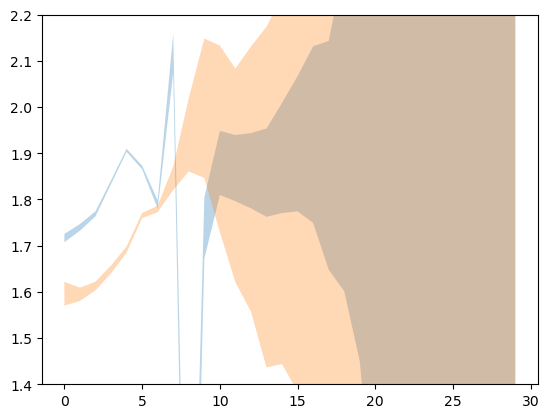

In [12]:

plt.fill_between(np.arange(30),quo_sm+quo_sm_e,quo_sm-quo_sm_e,alpha=.3)
plt.fill_between(np.arange(30),quo_bg+quo_bg_e,quo_bg-quo_bg_e,alpha=.3)
plt.ylim(1.4,2.2)

In [63]:
perfiles = np.load('/home/arodriguez/BACCO/bias_mock/perfiles/perfiles_smoothed_field_1e-03_15-18-1e-03-0.9.npy')

In [58]:
voidnumber = perfiles.shape[0]
voidbines = perfiles.shape[1]
realizaciones = 20
ndivision = int(voidnumber/realizaciones)

perfiles_jack = np.zeros([realizaciones,voidbines])

In [59]:
total_ids = np.arange(0,voidnumber)

exclude0 = 0
for i in range(realizaciones):
    exclude1 = exclude0 + ndivision
    
    # selecciono (excluyo) los indices para hacer el jacknife
    selection = total_ids[(total_ids < exclude0) | (total_ids > exclude1)]
    perfiles_jack[i,:] = pg.mean_profile(perfiles[selection,:].T)
        
    exclude0 = exclude1

In [60]:
perfiles_jack.shape

(20, 30)

In [61]:
perfiles_mean = np.zeros(voidbines)
perfiles_error = np.zeros(voidbines)

n = realizaciones
for i in range(voidbines):
    media = np.mean(perfiles_jack[:,i])
    error = np.sqrt(((n-1)/n)*np.sum((perfiles_jack[:,i]-media)**2))
    
    perfiles_mean[i]  = media
    perfiles_error[i] = error

<ErrorbarContainer object of 3 artists>

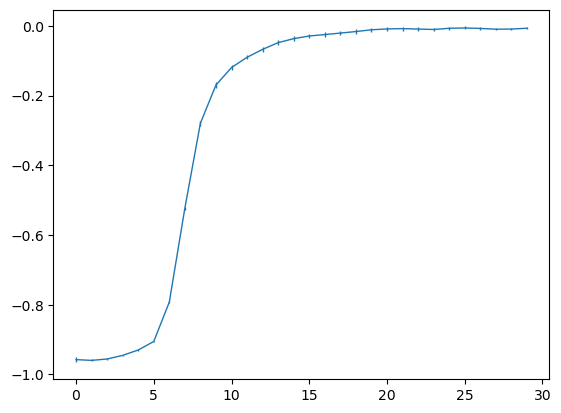

In [62]:
plt.errorbar(np.arange(30),perfiles_mean,perfiles_error,lw=1)

In [16]:
array_original = np.arange(1, 1000)

array_filtrado = array_original[(array_original < 100) | (array_original > 200)]

In [17]:
array_filtrado

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 28